In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
df = pd.DataFrame({
    'user_id':   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'banner':     [101, 102, 101, 103, 102, 101, 103, 104, 102, 101],
    'displays': [10, 20, 3, 5, 12, 23, 6, 9, 12, 20],
    'clicks': [4, 0, 3, 1, 0, 7, 4, 6, 8, 10],
    'channel': ['web', 'mobile', 'web', 'web', 'mobile', 'web', 'mobile', 'web', 'mobile', 'web']
})
df

,user_id,banner,displays,clicks,channel
0,1,101,10,4,web
1,2,102,20,0,mobile
2,3,101,3,3,web
3,4,103,5,1,web
4,5,102,12,0,mobile
5,6,101,23,7,web
6,7,103,6,4,mobile
7,8,104,9,6,web
8,9,102,12,8,mobile
9,10,101,20,10,web


Clusterize users

Clustering begins with visualizing the data with a scatterplot. A scatterplot shows dense regions with points close to each other. These dense points are clusters.
Next step is to apply one of the clustering methods to capture these clusters.
With regard to my dataset, I'm going to clusterize users based on their engagement, which will show how many displays they had and how many clicks they did.

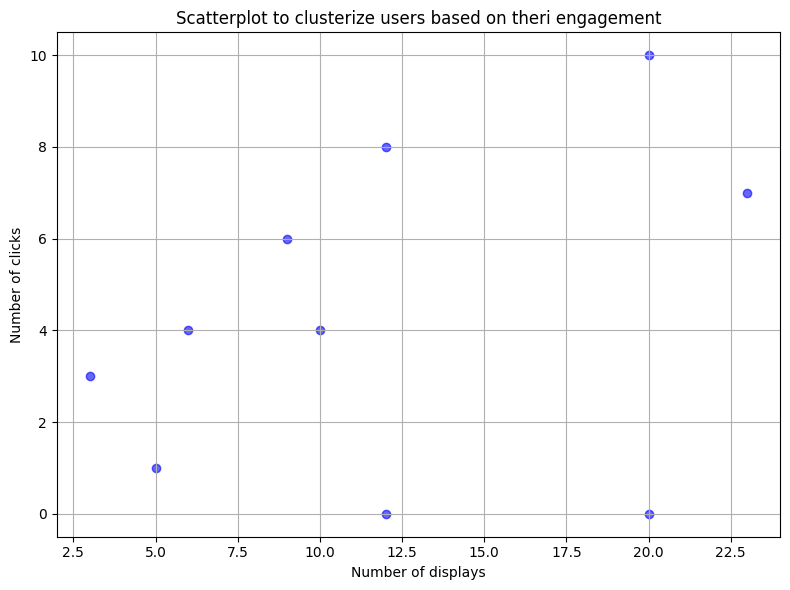

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.scatter(x = df['displays'], y = df['clicks'], c = 'blue', alpha = 0.6)
plt.xlabel('Number of displays')
plt.ylabel('Number of clicks')
plt.title('Scatterplot to clusterize users based on theri engagement')
plt.grid(True)
plt.tight_layout()

On this scatterplot, I see three clusters:
1. Two points at the bottom (No clicks = Not engaged, especially given high number of displays).
1. Five points on the left side (Up to 6 clicks = Moderately engaged).
3. Three points at the top (Up to 10 clicks = Highly engaged).

But is this so? A clustering algorithm will help us figure things out.

In [23]:
#First, I scale the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['clicks', 'displays']])

In [24]:
#I apply KMeans:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
df['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
#Let's make sure our dataset has the new column "cluster":
df

,user_id,banner,displays,clicks,channel,cluster
0,1,101,10,4,web,0
1,2,102,20,0,mobile,2
2,3,101,3,3,web,0
3,4,103,5,1,web,0
4,5,102,12,0,mobile,2
5,6,101,23,7,web,1
6,7,103,6,4,mobile,0
7,8,104,9,6,web,0
8,9,102,12,8,mobile,1
9,10,101,20,10,web,1


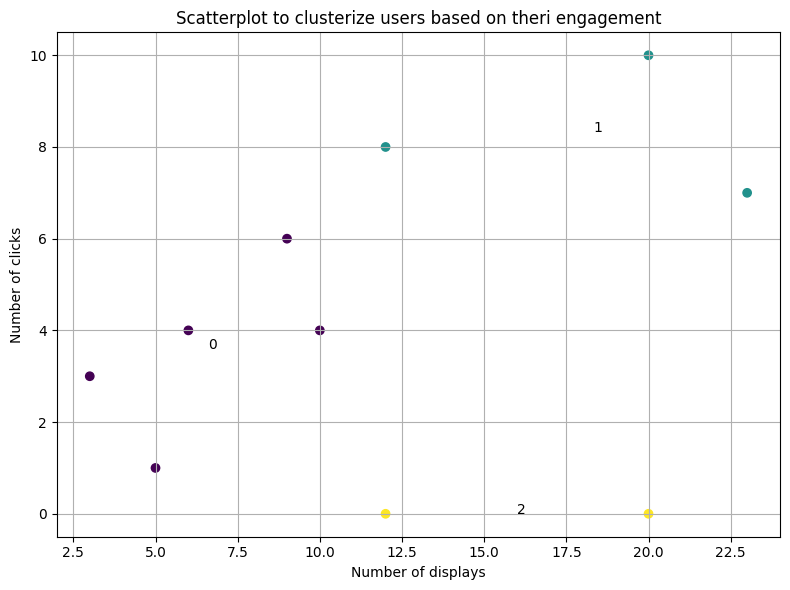

In [26]:
#Now let's visualize our clusters:

plt.figure(figsize = (8, 6))
plt.scatter(x = df['displays'], y = df['clicks'], c = df['cluster'])
plt.xlabel('Number of displays')
plt.ylabel('Number of clicks')
plt.title('Scatterplot to clusterize users based on theri engagement')
plt.grid(True)

for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    x_center = cluster_data['displays'].mean()
    y_center = cluster_data['clicks'].mean()
    plt.text(x_center, y_center, str(cluster_num))

plt.tight_layout()

It turned out I was right, and KMeans indeed discovered three clusters exactly how I described them. Let's view this inforation as a dataset:

In [27]:
df.groupby('cluster')[['displays', 'clicks']].sum().sort_values(by = 'clicks', ascending = False)

,displays,clicks
cluster,,
1,55,25
0,33,18
2,32,0


Now, I'm going to present the results of clusterization in a readable format.

In [28]:
#create a dict with cluster_labels:
labels = {1: 'Highly engaged', 0: 'Moderately engaged', 2: 'Unengaged'}

#create a dict with a cluster and empty list to keep users_id's:
clusters = {0: [], 1: [], 2: []}

#loop through each row in df and fill the empty list with user_id's:
for i in range(len(df)):
    num_cluster = df['cluster'][i]
    user_id = df['user_id'][i]
    clusters[num_cluster].append(user_id)

#control that clusters is filled correctly:
clusters

{0: [1, 3, 4, 7, 8], 1: [6, 9, 10], 2: [2, 5]}

Clusters is filled correctly, let's present the clusterization in readable format:

In [29]:
for num_cluster, user_id in clusters.items():
    print(f"The cluster {num_cluster} contains '{labels[num_cluster]}' users with user_ids: {user_id}")

The cluster 0 contains 'Moderately engaged' users with user_ids: [1, 3, 4, 7, 8]
The cluster 1 contains 'Highly engaged' users with user_ids: [6, 9, 10]
The cluster 2 contains 'Unengaged' users with user_ids: [2, 5]
